# Assignment \#2
#### Made by Timofey Sedov

## Task \#1

> In a research program on human health risk from recreational contact with water contaminated with pathogenic microbiological material, the National Institute of Water and Atmosphere (NIWA) instituted a study to determine the quality of NZ stream water at a variety of catchment types. This study is documented in McBride et al. (2002) where $n = 116$ one-liter water samples from sites
identified as having a heavy environmental impact from birds (seagulls) and
waterfowl. Out of these samples, $x = 17$ samples contained Giardia cysts. Let $\theta$
denote the true probability that a one-liter water sample from this type of site
contains Giardia cysts.

## Questions


> What is the conditional distribution of $X$, the number of samples containing Giardia cysts, given $\theta$?

The conditional distribution of $X$, given $\theta$ is a **binomial distribution** becuase each of $n = 116$ experiments is independent of other, the outcome of each experiment is either water sample having Giardia cysts or not and each experiment has probability of having Giardia cysts is $\theta$.

The formula is $P(X | \theta) = b(x; n = 116, \theta)$

Here is the example

In [1]:
import numpy as np
from scipy.stats import binom, beta
from scipy.integrate import quad
import matplotlib.pyplot as plt


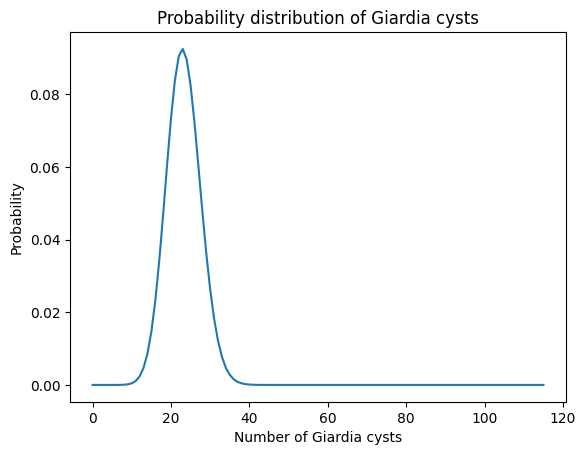

In [2]:
n = 116
p = 0.2
x = np.arange(0, n)
y = binom.pmf(x, n, p)
plt.plot(x, y)
plt.xlabel('Number of Giardia cysts')
plt.ylabel('Probability')
plt.title('Probability distribution of Giardia cysts')
plt.show()


> Before the experiment, the NIWA scientists elicited that the expected value of $\theta$ is $0.2$ with a standard deviation of $0.16$. Determine the parameters $\alpha$ and $\beta$ of a Beta prior distribution for $\theta$ with this prior mean and standard deviation. (Round $\alpha$ and $\beta$ to the nearest integer).

We can calculate the parameters of the Beta distribution from the mean and standard deviation of the prior distribution. The formula is $\alpha = \mu \cdot \left( \frac{\mu \cdot (1 - \mu)}{\sigma^2} - 1 \right)$ and $\beta = (1 - \mu) \cdot \left( \frac{\mu \cdot (1 - \mu)}{\sigma^2} - 1 \right) = (1 - \mu) \cdot \frac{\alpha}{\mu}$

In [3]:
def calculate_alpha_and_beta(mean: float, std: float) -> tuple[float, float]:
    """Calculation of alpha and beta from mean and standard deviation."""
    alpha = mean * ((mean * (1 - mean) / std ** 2) - 1)
    beta = (1 - mean) * alpha / mean
    return alpha, beta


print("alpha: {}, beta: {}".format(
    *map(round, calculate_alpha_and_beta(0.2, 0.16))))


alpha: 1, beta: 4


> Find the posterior distribution of $\theta$ and summarize it by its posterior mean and standard deviation.

Because of the [conjugate property of the Beta distribution with the binomial likelihood](https://en.wikipedia.org/wiki/Conjugate_prior#Example) the posterior distribution is going to be a Beta distribution as well. 

The formula is $P(\theta | X) = Beta(\alpha + x, \beta + n - x)$

Or in our case $P(\theta | X) = Beta(1 + 17, 4 + 99) = Beta(18, 103)$

It's mean is $\frac{\alpha}{\alpha + \beta} = \frac{18}{121} \approx 0.149$ and it's std is $\sqrt{\frac{\alpha\beta}{(\alpha + \beta + 1) \cdot (\alpha + \beta)^2}} \approx 0.032$

> Plot the prior, posterior and normalized likelihood.

0.008547008547008546


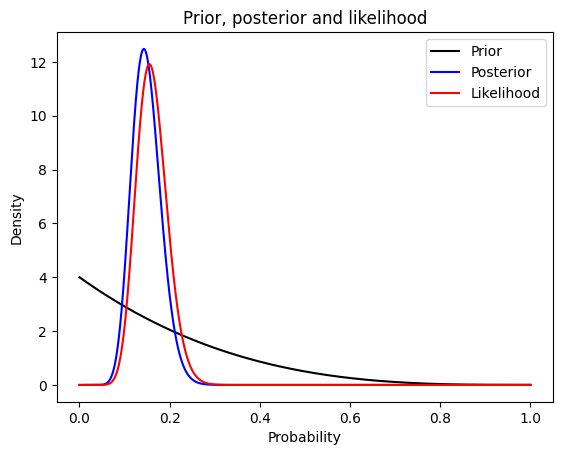

In [7]:
x = np.linspace(0, 1, 10000)

prior = beta.pdf(x, 1, 4)
posterior = beta.pdf(x, 18, 103)
likelihood = np.array([binom.pmf(18, 116, theta) for theta in x])

area = quad(lambda theta: binom.pmf(18, 116, theta), 0, 1)[0]
print(area)
normalized_likelihood = likelihood / area

plt.plot(x, prior, label='Prior', color='black')
plt.plot(x, posterior, label='Posterior', color='blue')
plt.plot(x, normalized_likelihood, label='Likelihood', color='red')
# plt.plot(x, normalized_likelihood * prior / 2.32, label='Prior * Likelihood', color='green')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.title('Prior, posterior and likelihood')
plt.legend()
plt.show()


> Find the posterior probability that $\theta$ is less than $0.1$.

In [5]:
print("Probability that the theta is less than 0.1: {}".format(
    quad(lambda theta: beta.pdf(theta, 18, 103), 0, 0.1)[0]))


Probability that the theta is less than 0.1: 0.05309437699304292


> Find a central 95% posterior credible interval for $\theta$.

In [6]:
alpha = 0.05
print("95% central posterior credible interval for theta is ({}; {})".format(
    *beta.ppf([0 + alpha / 2, 1 - alpha / 2], 18, 103)))


95% central posterior credible interval for theta is (0.09138957252823; 0.21710689824337648)
